<a href="https://colab.research.google.com/github/Deep-relay/DMA-Lab/blob/main/6th%20Lab/(Exercise)%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas
import numpy as np
df=pandas.read_csv('./sample_data/OnlineRetail.csv')
import matplotlib.pyplot as plt
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_colwidth', None)
pandas.set_option('display.width', 1000)


In [3]:
#1 Display mean, standard deviation, min and max price
print(f'Mean: {df["UnitPrice"].mean()} Standard Deviation: { df["UnitPrice"].std()} Min Price: {df["UnitPrice"].min()} Max Price: {df["UnitPrice"].max()}')

Mean: 5.9177635491606715 Standard Deviation: 149.0050845188856 Min Price: 0.0 Max Price: 16888.02


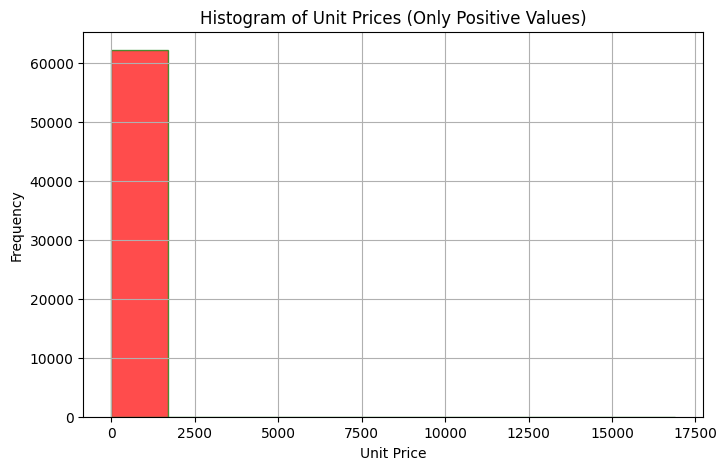

In [9]:
# 2. Plot histogram of prices

plt.figure(figsize=(8, 5))
positive_unit_prices = df[df["UnitPrice"] > 0]["UnitPrice"]
plt.hist(positive_unit_prices, color="red", alpha=0.7, edgecolor="green")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.title("Histogram of Unit Prices")
plt.grid(True)
plt.show()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
395472,571035,21238,RED RETROSPOT CUP,8,10/13/2011 12:50,0.85,12446.0,RSA
395473,571035,21243,PINK POLKADOT PLATE,8,10/13/2011 12:50,1.69,12446.0,RSA
395474,571035,23240,SET OF 4 KNICK KNACK TINS DOILY,6,10/13/2011 12:50,4.15,12446.0,RSA
395475,571035,23209,LUNCH BAG VINTAGE DOILY,10,10/13/2011 12:50,1.65,12446.0,RSA


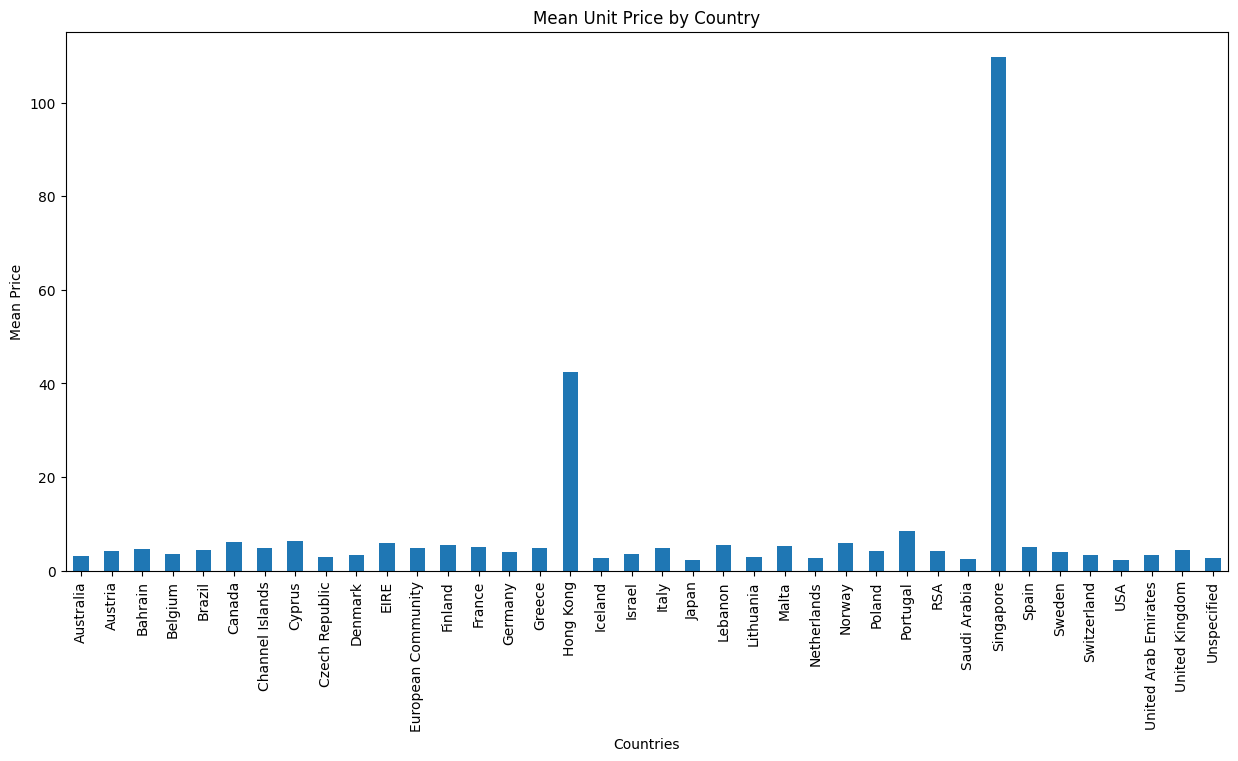

In [ ]:
# display(df.groupby('Country').head())
mean_prices_by_country = df.groupby('Country')['UnitPrice'].mean()
plt.figure(figsize=(15, 7))
mean_prices_by_country.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Mean Price')
plt.title('Mean Unit Price by Country')
plt.show()


In [ ]:
# 4. Find Min-Max price by customer
min_cust=df.groupby('CustomerID').min()
max_cust=df.groupby('CustomerID').max()
display(min_cust.head())
display(max_cust.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:01,1.04,United Kingdom
12347.0,537626,16008,3D DOG PICTURE PLAYING CARDS,2,1/26/2011 14:30,0.25,Iceland
12348.0,539318,21211,60 CAKE CASES DOLLY GIRL DESIGN,1,1/25/2011 10:42,0.29,Finland
12349.0,577609,20685,16 PIECE CUTLERY SET PANTRY DESIGN,1,11/21/2011 9:51,0.42,Italy
12350.0,543037,20615,4 TRADITIONAL SPINNING TOPS,1,2/2/2011 16:01,0.85,Norway


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
12346.0,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:17,1.04,United Kingdom
12347.0,581180,85232D,WOODLAND DESIGN COTTON TOTE BAG,240,8/2/2011 8:48,12.75,Iceland
12348.0,568172,POST,SWEETIES STICKERS,144,9/25/2011 13:13,40.00,Finland
12349.0,577609,POST,ZINC FOLKART SLEIGH BELLS,36,11/21/2011 9:51,300.00,Italy
12350.0,543037,POST,UNION JACK FLAG PASSPORT COVER,24,2/2/2011 16:01,40.00,Norway


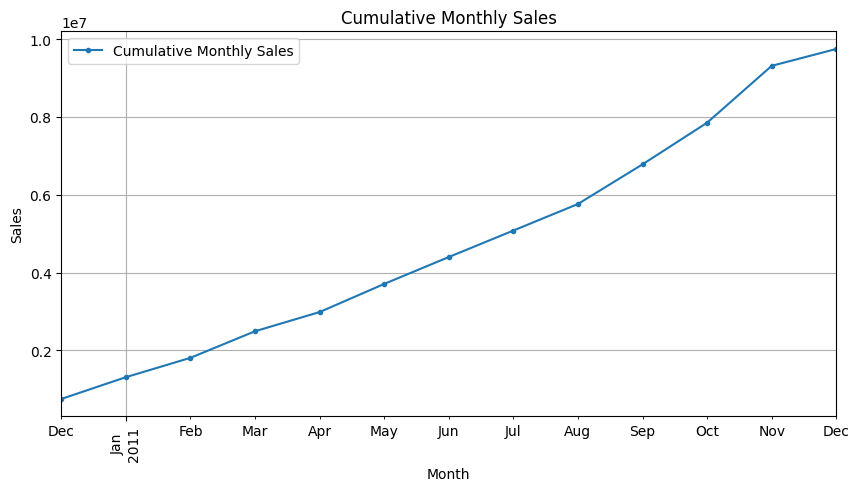

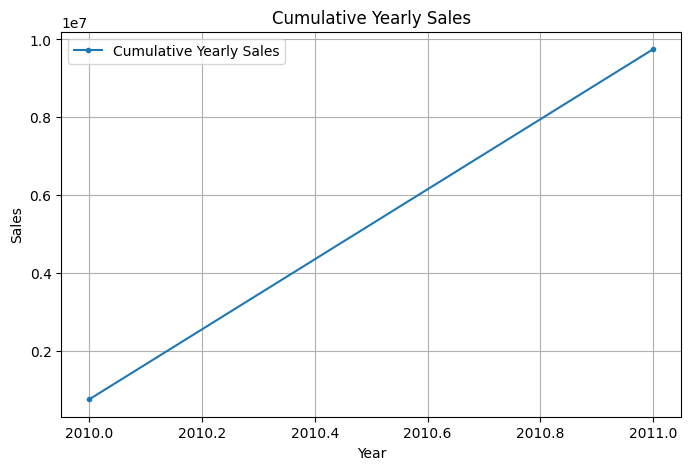

In [ ]:
# 5. Find cumulative sales monthly and yearly and plot them
df["InvoiceDate"] = pandas.to_datetime(df["InvoiceDate"])
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.to_period("M")
df["TotalSale"] = df["UnitPrice"] * df["Quantity"]

monthly_sales = df.groupby("Month")["TotalSale"].sum().cumsum()
yearly_sales = df.groupby("Year")["TotalSale"].sum().cumsum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(marker=".", label="Cumulative Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.legend()
plt.title("Cumulative Monthly Sales")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
yearly_sales.plot(marker=".",label="Cumulative Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.title("Cumulative Yearly Sales")
plt.grid(True)
plt.show()


#### 1. Read NIRF data as given in Dataset tab on Google Classroom.

In [ ]:
data=pandas.read_csv('./NIRF Dataset.csv')

#### 2. Group the data statewise and Count the number of colleges in each state.

In [ ]:
data_grouped_by_state=data.groupby(by='state').size()
# for state, entry in data_grouped_by_state:
#     print(state, entry)

display(data_grouped_by_state)

state
Andhra Pradesh       10
Arunachal Pradesh     2
Assam                 3
Bihar                 2
Chandigarh            2
Chhattisgarh          1
Delhi                 7
Goa                   1
Gujarat               7
Haryana               6
Himachal Pradesh      4
Jammu and Kashmir     1
Jharkhand             4
Karnataka            21
Kerala                5
Madhya Pradesh        5
Maharashtra          22
Manipur               1
Meghalaya             1
Odisha                7
Pondicherry           2
Punjab                8
Rajasthan             4
Tamil Nadu           35
Telangana            15
Tripura               1
Uttar Pradesh        11
Uttarakhand           4
West Bengal           8
dtype: int64

#### 3. Sort the records based on rpc attribute (Research Professional practices).

In [ ]:
data_sorted_by_rpc=data.sort_values(by='rpc', ascending=False)
# display(data.sort_values(by='rpc', ascending=False)[['rpc', 'name']])
data_sorted_by_rpc['rank']=data_sorted_by_rpc['rpc'].rank(method='min', ascending=False)
display(data_sorted_by_rpc[['rank', 'rpc', 'name']])


,rank,rpc,name
1,1.00,96.15,Indian Institute of Technology Delhi
0,2.00,94.64,Indian Institute of Technology Madras
2,3.00,93.37,Indian Institute of Technology Bombay
4,4.00,87.11,Indian Institute of Technology Kharagpur
3,5.00,82.08,Indian Institute of Technology Kanpur
5,6.00,76.57,Indian Institute of Technology Roorkee
6,7.00,70.73,Indian Institute of Technology Guwahati
14,8.00,64.06,Vellore Institute of Technology
11,9.00,63.12,Indian Institute of Technology (Indian School of Mines)
16,10.00,62.04,Jadavpur University


#### 4. Find the rank of Panjab University as per rpc attribute.

In [ ]:
panjab_university_rank=data_sorted_by_rpc[data_sorted_by_rpc['name']=='Panjab University']['rank'].iloc[0]
print(panjab_university_rank)
display(data_sorted_by_rpc[data_sorted_by_rpc['name']=='Panjab University'][['rank', 'rpc', 'name']])

26.0


,rank,rpc,name
71,26.0,43.55,Panjab University


#### 5. List the colleges whose rpc value is less than Panjab University and rank is higher(rank value is less).

In [ ]:
display(data_sorted_by_rpc[data_sorted_by_rpc['rank']>panjab_university_rank][['name', 'rank', 'rpc']])

,name,rank,rpc
40,S. R. M. Institute of Science and Technology,27.00,41.96
34,Malaviya National Institute of Technology,28.00,41.69
39,National Institute of Technology Kurukshetra,29.00,41.64
25,Indian Institute of Technology Patna,30.00,39.24
18,National Institute of Technology Warangal,31.00,38.12
21,Indian Institute of Technology Bhubaneswar,32.00,37.17
46,National Institute of Technology Durgapur,33.00,36.98
30,Indian Institute of Technology Mandi,34.00,36.80
42,International Institute of Information Technology Hyderabad,35.00,36.66
45,National Institute of Technology Silchar,36.00,35.41


#### 6. Draw the Histogram for colleges based on tlr values by dividing the overall data in 10 bins.

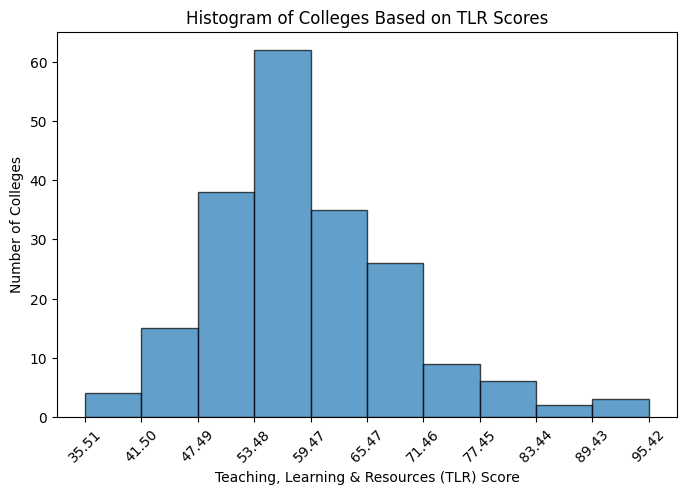

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 5))
plt.hist(data["tlr"], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel("TLR Score")
plt.ylabel("Number of Colleges")

